In [1]:
%matplotlib inline

In [2]:
import tensorflow as tf
import pandas as pd

from os.path import expanduser

SRC_PATH = expanduser("~") + '/SageMaker/mastering-ml-on-aws/chapter3/'

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

housing_df = pd.read_csv(SRC_PATH + 'train.csv')
training_df, test_df = train_test_split(housing_df, test_size=0.2)

training_df.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
45,68,0.05789,12.5,6.07,0,0.409,5.878,21.4,6.4980,4,345,18.9,396.21,8.10,22.0
253,385,20.08490,0.0,18.10,0,0.700,4.368,91.2,1.4395,24,666,20.2,285.83,30.63,8.8
264,404,24.80170,0.0,18.10,0,0.693,5.349,96.0,1.7028,24,666,20.2,396.90,19.77,8.3
217,328,0.24103,0.0,7.38,0,0.493,6.083,43.7,5.4159,5,287,19.6,396.90,12.79,22.2
312,477,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68,16.7


In [4]:
training_features = ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'tax', 'ptratio', 'lstat']
label = 'medv'

In [5]:
training_columns = [tf.feature_column.numeric_column(f) for f in training_features]

In [6]:
tf_regressor = tf.estimator.LinearRegressor(feature_columns=training_columns)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpqmxq650v', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fb6f744bd68>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [7]:
training_input_fn = tf.estimator.inputs.pandas_input_fn(
    x = training_df[training_features],
    y = training_df[label],
    shuffle=False,
    batch_size=1,
    num_epochs=100,
    queue_capacity=1000,
    num_threads=1)

test_input_fn = tf.estimator.inputs.pandas_input_fn(
    x = test_df[training_features],
    y = test_df[label],
    shuffle=False,
    batch_size=1)


In [8]:
tf_regressor.train(input_fn=training_input_fn, steps=50000)

Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmpqmxq650v/model.ckpt.
INFO:tensorflow:loss = 484.0, step = 1
INFO:tensorflow:global_step/sec: 130.444
INFO:tensorflow:loss = 203.63542, step = 101 (0.768 sec)
INFO:tensorflow:global_step/sec: 734.62
INFO:tensorflow:loss = 6.4690137, step = 201 (0.136 sec)
INFO:tensorflow:global_step/sec: 743.253
INFO:tensorflow:loss = 21.553267, step = 301 (0.134 sec)
INFO:tensorflow:global_step/sec: 457.183
INFO:tensorflow:loss = 3.6023417, step = 401 (0.219 sec)
INFO:tens

INFO:tensorflow:loss = 16.453455, step = 6901 (0.253 sec)
INFO:tensorflow:global_step/sec: 397.05
INFO:tensorflow:loss = 138.14064, step = 7001 (0.251 sec)
INFO:tensorflow:global_step/sec: 397.206
INFO:tensorflow:loss = 50.55367, step = 7101 (0.252 sec)
INFO:tensorflow:global_step/sec: 396.904
INFO:tensorflow:loss = 8.145839, step = 7201 (0.253 sec)
INFO:tensorflow:global_step/sec: 397.594
INFO:tensorflow:loss = 0.22072996, step = 7301 (0.250 sec)
INFO:tensorflow:global_step/sec: 398.081
INFO:tensorflow:loss = 39.241924, step = 7401 (0.251 sec)
INFO:tensorflow:global_step/sec: 398.5
INFO:tensorflow:loss = 3.7712655, step = 7501 (0.251 sec)
INFO:tensorflow:global_step/sec: 398.803
INFO:tensorflow:loss = 13.926588, step = 7601 (0.251 sec)
INFO:tensorflow:global_step/sec: 398.184
INFO:tensorflow:loss = 1.9283407, step = 7701 (0.251 sec)
INFO:tensorflow:global_step/sec: 389.605
INFO:tensorflow:loss = 0.18916148, step = 7801 (0.258 sec)
INFO:tensorflow:global_step/sec: 398.231
INFO:tensorfl

INFO:tensorflow:loss = 6.0966387, step = 15201 (0.255 sec)
INFO:tensorflow:global_step/sec: 391.743
INFO:tensorflow:loss = 7.0998306, step = 15301 (0.255 sec)
INFO:tensorflow:global_step/sec: 393.167
INFO:tensorflow:loss = 4.011246, step = 15401 (0.254 sec)
INFO:tensorflow:global_step/sec: 391.511
INFO:tensorflow:loss = 5.487604, step = 15501 (0.255 sec)
INFO:tensorflow:global_step/sec: 391.35
INFO:tensorflow:loss = 6.946192, step = 15601 (0.255 sec)
INFO:tensorflow:global_step/sec: 392.477
INFO:tensorflow:loss = 9.790699, step = 15701 (0.255 sec)
INFO:tensorflow:global_step/sec: 397.565
INFO:tensorflow:loss = 59.58647, step = 15801 (0.252 sec)
INFO:tensorflow:global_step/sec: 399.371
INFO:tensorflow:loss = 18.004166, step = 15901 (0.250 sec)
INFO:tensorflow:global_step/sec: 397.335
INFO:tensorflow:loss = 18.305788, step = 16001 (0.252 sec)
INFO:tensorflow:global_step/sec: 397.118
INFO:tensorflow:loss = 37.644337, step = 16101 (0.253 sec)
INFO:tensorflow:global_step/sec: 393.915
INFO:t

INFO:tensorflow:global_step/sec: 399.74
INFO:tensorflow:loss = 103.2404, step = 23501 (0.250 sec)
INFO:tensorflow:global_step/sec: 396.653
INFO:tensorflow:loss = 1.1025144, step = 23601 (0.252 sec)
INFO:tensorflow:global_step/sec: 399.087
INFO:tensorflow:loss = 1.3456793, step = 23701 (0.251 sec)
INFO:tensorflow:global_step/sec: 392.345
INFO:tensorflow:loss = 3.195976, step = 23801 (0.255 sec)
INFO:tensorflow:global_step/sec: 394.345
INFO:tensorflow:loss = 32.321365, step = 23901 (0.255 sec)
INFO:tensorflow:global_step/sec: 396.06
INFO:tensorflow:loss = 18.39056, step = 24001 (0.251 sec)
INFO:tensorflow:global_step/sec: 390.646
INFO:tensorflow:loss = 3.707583, step = 24101 (0.256 sec)
INFO:tensorflow:global_step/sec: 393.178
INFO:tensorflow:loss = 18.290808, step = 24201 (0.258 sec)
INFO:tensorflow:global_step/sec: 392.296
INFO:tensorflow:loss = 8.881898, step = 24301 (0.251 sec)
INFO:tensorflow:global_step/sec: 393.541
INFO:tensorflow:loss = 9.213459, step = 24401 (0.254 sec)
INFO:ten

In [9]:
tf_regressor.evaluate(input_fn=test_input_fn)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-03-02-16:25:48
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpqmxq650v/model.ckpt-26600
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-03-02-16:25:48
INFO:tensorflow:Saving dict for global step 26600: average_loss = 28.09547, global_step = 26600, label/mean = 23.952238, loss = 28.09547, prediction/mean = 23.619377
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 26600: /tmp/tmpqmxq650v/model.ckpt-26600


{'average_loss': 28.09547,
 'label/mean': 23.952238,
 'loss': 28.09547,
 'prediction/mean': 23.619377,
 'global_step': 26600}

In [10]:
predictions = tf_regressor.predict(input_fn=test_input_fn)

In [11]:
predicted_values = [prediction['predictions'][0] for prediction in predictions]

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpqmxq650v/model.ckpt-26600
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [12]:
predicted_values[:5]

[25.70946, 11.493786, 24.836472, 17.794605, 12.695982]

In [13]:
test_df['prediction'] = predicted_values

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [14]:
test_df.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,prediction
216,326,0.19186,0.0,7.38,0,0.493,6.431,14.7,5.4159,5,287,19.6,393.68,5.08,24.6,25.709459
86,127,0.38735,0.0,25.65,0,0.581,5.613,95.6,1.7572,2,188,19.1,359.29,27.26,15.7,11.493786
75,112,0.10084,0.0,10.01,0,0.547,6.715,81.6,2.6775,6,432,17.8,395.59,10.16,22.8,24.836472
314,479,10.23300,0.0,18.10,0,0.614,6.185,96.7,2.1705,24,666,20.2,379.70,18.03,14.6,17.794605
274,426,15.86030,0.0,18.10,0,0.679,5.896,95.4,1.9096,24,666,20.2,7.68,24.39,8.3,12.695982


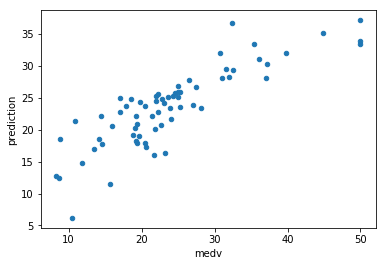

In [15]:
test_df.plot(kind='scatter', x=label, y='prediction')